In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from scipy import stats
import itertools
from sklearn import metrics

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/winequality-red.csv')

In [ ]:
column_mapping = {
    'fixed acidity': 'fiksna kiselost',
    'volatile acidity': 'isparljiva kiselost',
    'citric acid': 'limunska kiselina',
    'residual sugar': 'rezidualni šećer',
    'chlorides': 'hloridi',
    'free sulfur dioxide': 'slobodni sumpor-dioksid',
    'total sulfur dioxide': 'ukupni sumpor-dioksid',
    'density': 'gustina',
    'pH': 'pH',
    'sulphates': 'sulfati',
    'alcohol': 'alkohol',
    'quality': 'kvalitet'
}

df = df.rename(columns=column_mapping)
df.head()

,fiksna kiselost,isparljiva kiselost,limunska kiselina,rezidualni šećer,hloridi,slobodni sumpor-dioksid,ukupni sumpor-dioksid,gustina,pH,sulfati,alkohol,kvalitet
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fiksna kiselost,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
isparljiva kiselost,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
limunska kiselina,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
rezidualni šećer,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
hloridi,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
slobodni sumpor-dioksid,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
ukupni sumpor-dioksid,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
gustina,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulfati,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
df.shape

(1599, 12)

In [ ]:
null_values = df.isnull().sum()
print(null_values)

fiksna kiselost            0
isparljiva kiselost        0
limunska kiselina          0
rezidualni šećer           0
hloridi                    0
slobodni sumpor-dioksid    0
ukupni sumpor-dioksid      0
gustina                    0
pH                         0
sulfati                    0
alkohol                    0
kvalitet                   0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   fiksna kiselost          1599 non-null   float64
 1   isparljiva kiselost      1599 non-null   float64
 2   limunska kiselina        1599 non-null   float64
 3   rezidualni šećer         1599 non-null   float64
 4   hloridi                  1599 non-null   float64
 5   slobodni sumpor-dioksid  1599 non-null   float64
 6   ukupni sumpor-dioksid    1599 non-null   float64
 7   gustina                  1599 non-null   float64
 8   pH                       1599 non-null   float64
 9   sulfati                  1599 non-null   float64
 10  alkohol                  1599 non-null   float64
 11  kvalitet                 1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


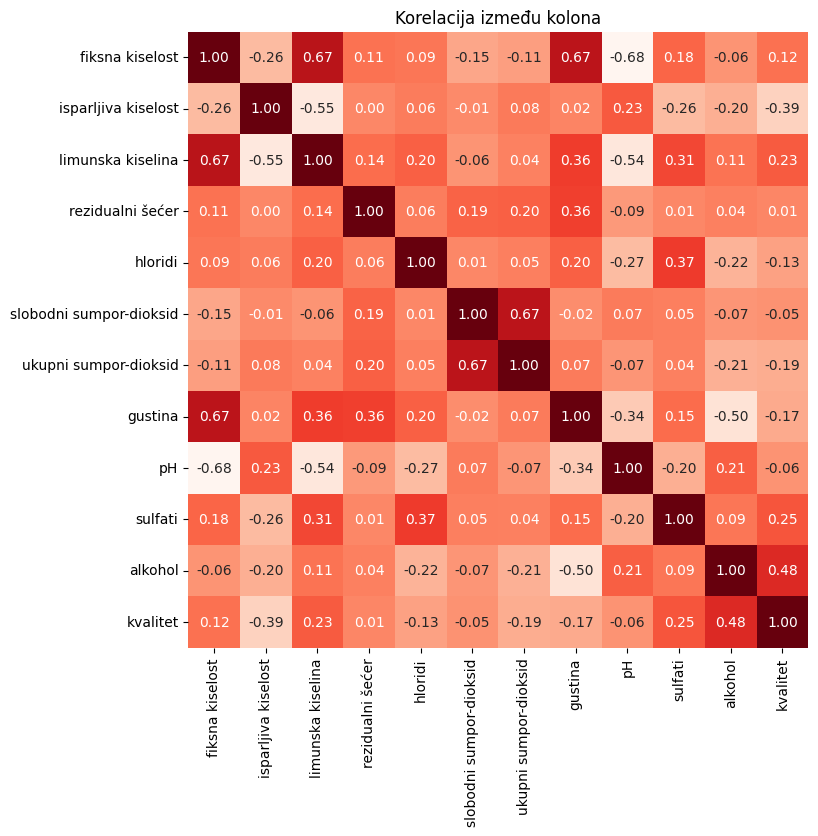

In [ ]:
X1 = df.drop(columns='kvalitet', axis=1)
y1 = df.kvalitet.values

corr = X1.corr()

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cbar=False, cmap='Reds', fmt='.2f')
plt.title("Korelacija između kolona")
plt.show()

In [ ]:
new_df  = df.copy()
columns = df.columns.tolist()

skew_df = df[columns].skew().to_frame().rename(columns={0:"Mjera asimetrije"})
skew_df

,Mjera asimetrije
fiksna kiselost,0.982751
isparljiva kiselost,0.671593
limunska kiselina,0.318337
rezidualni šećer,4.540655
hloridi,5.680347
slobodni sumpor-dioksid,1.250567
ukupni sumpor-dioksid,1.515531
gustina,0.071288
pH,0.193683
sulfati,2.428672


In [ ]:
for col in columns:
    transformed_col,_ = stats.yeojohnson(df[col])
    df[col] = transformed_col

ValueError: ignored

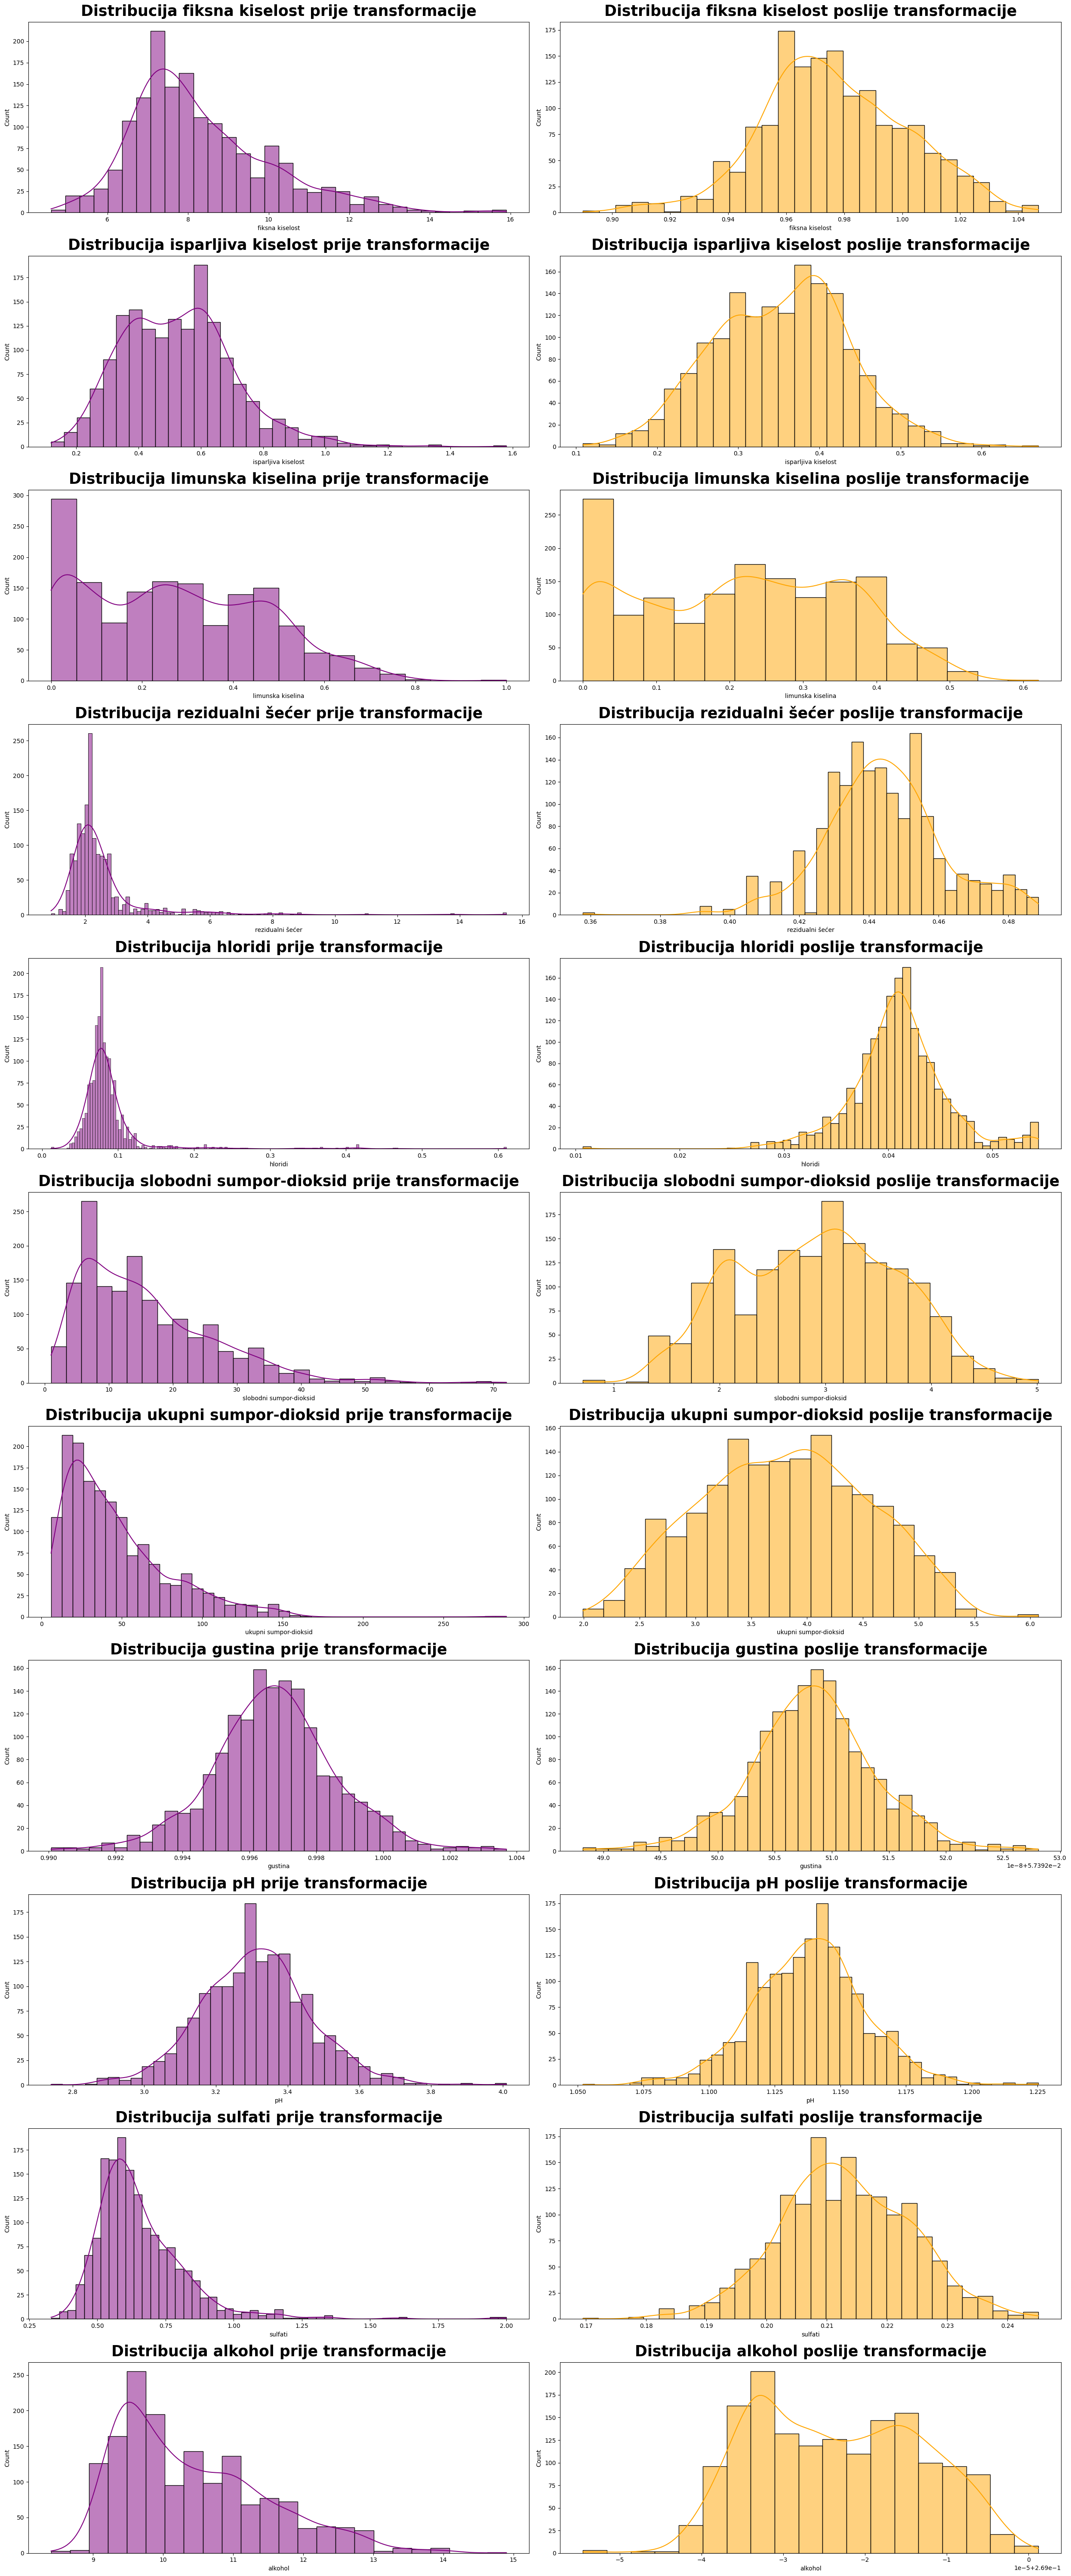

In [ ]:
x=1
y=2


plt.figure(figsize=(25,60))
for col in columns:
    plt.subplot(11,2,x)
    sns.histplot(new_df[col],kde=True,color="purple")
    plt.title(f"Distribucija {col} prije transformacije",fontweight="black",size=25,pad=10)
    x+=2

    plt.subplot(11,2,y)
    sns.histplot(df[col],kde=True, color="orange")
    plt.title(f"Distribucija {col} poslije transformacije",fontweight="black",size=25,pad=10)
    y+=2

    plt.tight_layout()

In [ ]:
X = df.drop('kvalitet', axis=1)
y = df['kvalitet']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_pred = linear_model.predict(X_test)

#Random Forest
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Support Vector Regression
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

In [ ]:
# Neural Network
nnmodel = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(11,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)])

nnmodel.compile(optimizer='adam', loss='mse', metrics=['mae'])
nnmodel.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

nn_pred = nnmodel.predict(X_test)

Epoch 1/100
32/32 [==============================] - 1s 14ms/step - loss: 3.7888 - mae: 1.6218 - val_loss: 0.4110 - val_mae: 0.5202
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.3867 - mae: 0.5046 - val_loss: 0.3233 - val_mae: 0.4527
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.3142 - mae: 0.4533 - val_loss: 0.2849 - val_mae: 0.4263
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2773 - mae: 0.4255 - val_loss: 0.2464 - val_mae: 0.3961
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 0.2317 - mae: 0.3871 - val_loss: 0.1878 - val_mae: 0.3466
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1803 - mae: 0.3419 - val_loss: 0.1448 - val_mae: 0.3110
Epoch 7/100
32/32 [==============================] - 0s 7ms/step - loss: 0.1450 - mae: 0.3130 - val_loss: 0.1181 - val_mae: 0.2869
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.1241 - 

In [ ]:
model_metrics = []
rmse_lr = np.sqrt(mean_squared_error(y_test, linear_pred))
rmse_rf = np.sqrt(mean_squared_error(y_test, rf_pred))
rmse_gb = np.sqrt(mean_squared_error(y_test, gb_pred))
rmse_svr = np.sqrt(mean_squared_error(y_test, svr_pred))
rmse_nn = np.sqrt(mean_squared_error(y_test, nn_pred))

mae_lr = mean_absolute_error(y_test, linear_pred)
mae_rf = mean_absolute_error(y_test, rf_pred)
mae_gb = mean_absolute_error(y_test, gb_pred)
mae_svr = mean_absolute_error(y_test, svr_pred)
mae_nn = mean_absolute_error(y_test, nn_pred)

r2_lr = r2_score(y_test, linear_pred)
r2_rf = r2_score(y_test, rf_pred)
r2_gb = r2_score(y_test, gb_pred)
r2_svr = r2_score(y_test, svr_pred)
r2_nn = r2_score(y_test, nn_pred)

linear_model_metrics = [mae_lr, mean_squared_error(y_test, linear_pred),rmse_lr,r2_lr]
model_metrics.append(linear_model_metrics)

rf_model_metrics = [mae_rf, mean_squared_error(y_test, rf_pred),rmse_rf, r2_rf]
model_metrics.append(rf_model_metrics)

gb_model_metrics = [mae_gb, mean_squared_error(y_test, gb_pred), rmse_gb, r2_gb]
model_metrics.append(gb_model_metrics)

svr_model_metrics = [mae_svr, mean_squared_error(y_test, svr_pred), rmse_svr, r2_svr]
model_metrics.append(svr_model_metrics)

nn_model_metrics = [mae_nn, mean_squared_error(y_test, nn_pred), rmse_nn, r2_nn]
model_metrics.append(nn_model_metrics)

model_names = ['Linear Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Regression', 'Neural Network']

for i, metrics in enumerate(model_metrics):
    print("Model:", model_names[i])
    print("MAE:", metrics[0])
    print("MSE:", metrics[1])
    print("RMSE:", metrics[2])
    print("R-squared:", metrics[3])
    print()

best_model_index = np.argmin([metrics[2] for metrics in model_metrics])

best_model_name = model_names[best_model_index]
print("Najbolji Model:", best_model_name)


Model: Linear Regression
MAE: 0.20319154171130832
MSE: 0.06557385772825276
RMSE: 0.25607393020034813
R-squared: 0.408171308190977

Model: Random Forest
MAE: 0.17716364758241268
MSE: 0.05409165081990699
RMSE: 0.23257611833528177
R-squared: 0.511802537602678

Model: Gradient Boosting
MAE: 0.19999789519060882
MSE: 0.06315666749978717
RMSE: 0.251309903306231
R-squared: 0.42998735776205455

Model: Support Vector Regression
MAE: 0.23858396330554976
MSE: 0.088755694313523
RMSE: 0.2979189391655438
R-squared: 0.1989465272295261

Model: Neural Network
MAE: 0.23355671548713736
MSE: 0.08868582674928993
RMSE: 0.29780165672690595
R-squared: 0.19957710823501307

Najbolji Model: Random Forest


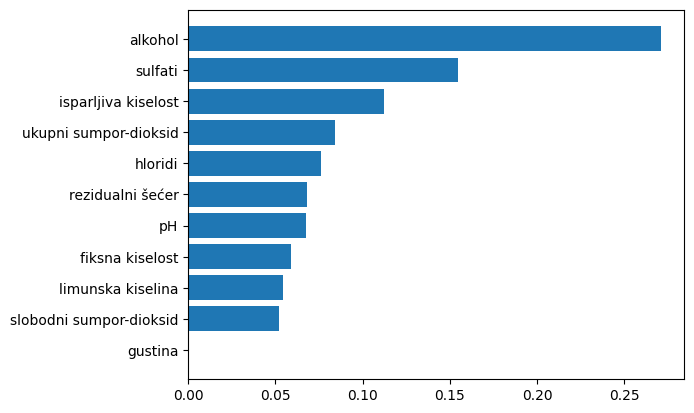

In [ ]:
importance = rf_model.feature_importances_
indices = np.argsort(importance)
fig, ax = plt.subplots()
ax.barh(range(len(importance)), importance[indices])
ax.set_yticks(range(len(importance)))
_ = ax.set_yticklabels(np.array(X_train.columns)[indices])

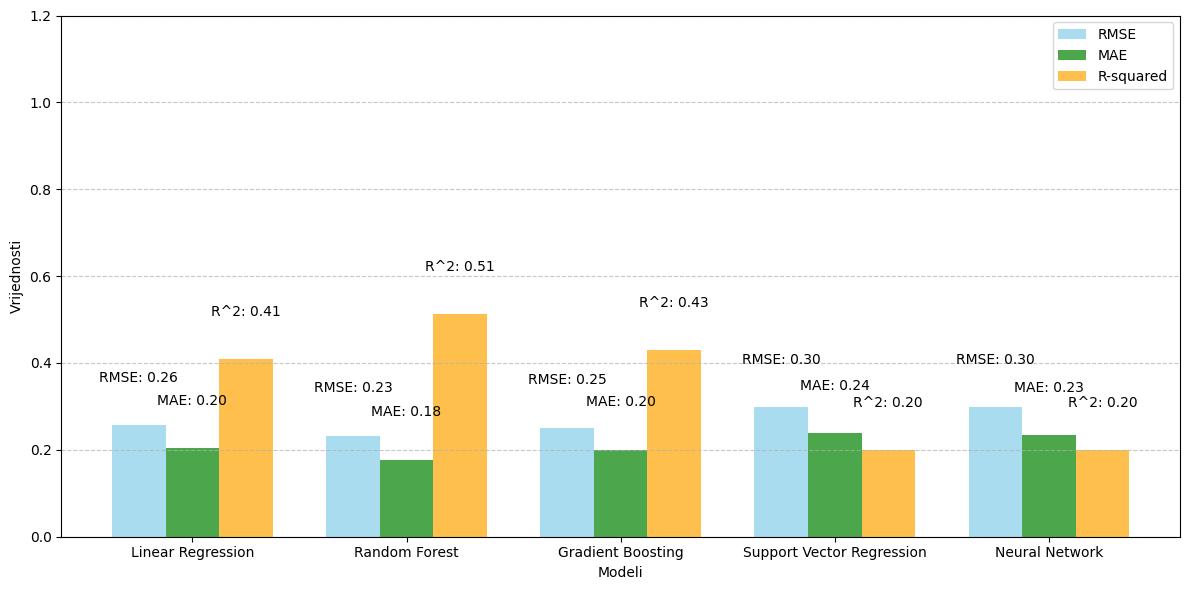

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

rmse_values = [rmse_lr, rmse_rf, rmse_gb, rmse_svr, rmse_nn]
mae_values = [mae_lr, mae_rf, mae_gb, mae_svr, mae_nn]
r2_values = [r2_lr, r2_rf, r2_gb, r2_svr, r2_nn]

# Grafikon
bar_width = 0.25
x = np.arange(len(model_names))
fig, ax = plt.subplots(figsize=(12, 6))

bar1 = ax.bar(x - bar_width, rmse_values, bar_width, label='RMSE', color='skyblue', alpha=0.7)
bar2 = ax.bar(x, mae_values, bar_width, label='MAE', color='green', alpha=0.7)
bar3 = ax.bar(x + bar_width, r2_values, bar_width, label='R-squared', color='orange', alpha=0.7)

ax.set_xlabel('Modeli')
ax.set_ylabel('Vrijednosti')
#ax.set_title('Poređenje RMSE, MAE i R^2 vrijednosti modela')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.set_ylim(0, max(max(rmse_values), 1) + 0.2)
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend()

for i, (rmse, mae, r2) in enumerate(zip(rmse_values, mae_values, r2_values)):
    ax.text(i - bar_width, rmse + 0.1, f'RMSE: {rmse:.2f}', ha='center')
    ax.text(i, mae + 0.1, f'MAE: {mae:.2f}', ha='center')
    ax.text(i + bar_width, r2 + 0.1, f'R^2: {r2:.2f}', ha='center')

plt.tight_layout()
plt.show()
